# Udacity Project - Communicate data findings
## by Patrick Schütze

## Preliminary Wrangling

In the original dataset there are 81 columns with 113937 rows. I decided to only load varbiales of interest into the dataframe. Therfore the dataset contains 26 columns with 113937 rows. Each loan contain information on the borrowered's background information and details regarding the loans.

## Table of Contents

#### 1. Introduction
#### 2. Data Gathering
#### 3. Data Assessing
#### 4. Data Cleaning
#### 5. Feature Engineering
#### 6. Exploratory Data Analysis
Univariate Visualizations<br>
Bivariate Visualizations<br>
Multivariate Visualizations

## 1. Introduction

## 2. Data Gathering

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import squarify

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
# load dataset with specific columns
loan = pd.read_csv('prosperLoanData.csv', usecols=['ListingKey',
                                                    'ListingNumber',
                                                    'ListingCreationDate',
                                                    'BorrowerAPR',
                                                    'BorrowerRate',
                                                    'LenderYield',
                                                    'EstimatedLoss',
                                                    'EstimatedReturn',
                                                    'ProsperRating (numeric)',
                                                    'ProsperRating (Alpha)',
                                                    'ProsperScore',
                                                    'ListingCategory (numeric)',
                                                    'BorrowerState',
                                                    'Occupation',
                                                    'EmploymentStatus',
                                                    'IsBorrowerHomeowner',
                                                    'CreditScoreRangeLower',
                                                    'CreditScoreRangeUpper',
                                                    'AvailableBankcardCredit',
                                                    'IncomeRange',
                                                    'IncomeVerifiable',
                                                    'StatedMonthlyIncome',
                                                    'LoanNumber',
                                                    'LoanOriginalAmount',
                                                    'LoanOriginationDate',
                                                    'MonthlyLoanPayment'])
loan.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

   BorrowerAPR  BorrowerRate  LenderYield  EstimatedLoss  EstimatedReturn  \
0      0.16516        0.1580       0.1380            NaN              NaN   
1      0.12016        0.0920       0.0820         0.0249          0.05470   
2      0.28269        0.2750       0.2400            NaN              NaN   
3      0.12528        0.0974       0.0874         0.0249          0.06000   
4      0.24614        0.2085       0.1985         0.0925          0.09066   

   ProsperRating (numeric) ProsperRating (Alpha)        ...          \
0                      NaN                   NaN        ...           
1                      6.0                     A        ...           
2                      NaN                   NaN        ...           
3                      6.0                     A        ...           
4                      3.0                     D        ...           

   CreditScoreRangeLower  CreditScoreRangeUpper AvailableBankcardCredit  \
0                  640.0                  659.0                  1500.0   
1                  680.0                  699.0                 10266.0   
2                  480.0                  499.0                     NaN   
3                  800.0                  819.0                 30754.0   
4                  680.0                  699.0                   695.0   

      IncomeRange IncomeVerifiable  StatedMonthlyIncome  LoanNumber  \
0  $25,000-49,999             True          3083.333333       19141   
1  $50,000-74,999             True          6125.000000      134815   
2   Not displayed             True          2083.333333        6466   
3  $25,000-49,999             True          2875.000000       77296   
4       $100,000+             True          9583.333333      102670   

   LoanOriginalAmount  LoanOriginationDate MonthlyLoanPayment  
0                9425  2007-09-12 00:00:00             330.43  
1               10000  2014-03-03 00:00:00             318.93  
2                3001  2007-01-17 00:00:00             123.32  
3               10000  2012-11-01 00:00:00             321.45  
4               15000  2013-09-20 00:00:00             563.97  

[5 rows x 26 columns]

## 3. Data Assessing

In [3]:
loan.shape

(113937, 26)

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 26 columns):
ListingKey                   113937 non-null object
ListingNumber                113937 non-null int64
ListingCreationDate          113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
LenderYield                  113937 non-null float64
EstimatedLoss                84853 non-null float64
EstimatedReturn              84853 non-null float64
ProsperRating (numeric)      84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
IsBorrowerHomeowner          113937 non-null bool
CreditScoreRangeLower        113346 non-null float64
Credit

In [5]:
# check for null values
loan.isna().any()

ListingKey                   False
ListingNumber                False
ListingCreationDate          False
BorrowerAPR                   True
BorrowerRate                 False
LenderYield                  False
EstimatedLoss                 True
EstimatedReturn               True
ProsperRating (numeric)       True
ProsperRating (Alpha)         True
ProsperScore                  True
ListingCategory (numeric)    False
BorrowerState                 True
Occupation                    True
EmploymentStatus              True
IsBorrowerHomeowner          False
CreditScoreRangeLower         True
CreditScoreRangeUpper         True
AvailableBankcardCredit       True
IncomeRange                  False
IncomeVerifiable             False
StatedMonthlyIncome          False
LoanNumber                   False
LoanOriginalAmount           False
LoanOriginationDate          False
MonthlyLoanPayment           False
dtype: bool

In [6]:
loan.duplicated().any()

False

Cleaning Issues:

- ListingCreationDate is a string. This will be converted into DateTime

Missing Values in:

- BorrowerAPR: Further assessment needed.
- EstimatedLoss: Entries only existing for loans originated after July 2009. Loans before July 2009 will be removed.
- EstimatedReturn: Entries only existing for loans originated after July 2009. Loans before July 2009 will be removed.
- ProsperRating (numeric): Entries only existing for loans originated after July 2009. Loans before July 2009 will be removed.
- ProsperRating (Alpha): Entries only existing for loans originated after July 2009. Loans before July 2009 will be removed.
- ProsperScore: Entries only existing for loans originated after July 2009. Loans before July 2009 will be removed.
- BorrowerState: Further assessment needed.
- EmploymentStatus: Further assessment needed.
- CreditScoreRangeLower: Further assessment needed.
- CreditScoreRangeUpper: Further assessment needed.
- AvailableBankcardCredit: Further assessment needed.

### What is the structure of your dataset?

In the original dataset there are 81 columns with 113937 rows. I decided to only load varbiales of interest into the dataframe. Therfore the dataset contains 26 columns with 113937 rows. Each loan contain information on the borrowered's background information and details regarding the loans.


### What is/are the main feature(s) of interest in your dataset?

BorrowerAPR, BorroweRate, ProsperScore, ProsperRating, Occupation, EstimatedReturn, EstimatedLoss and LoanOriginalAmount

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The ProsperScore and the ProsperRating will have a strong effect on the BorrowerRate and the BorrowerAPR.

In [7]:
# copy loan data for cleaning
loan_clean = loan.copy()

#### 4.1 Convert 'ListingCreationDate' to DateTime and remove loans originated before July 2009

In [8]:
# convert 'ListingCreationDate' to datetime
loan_clean['ListingCreationDate']=pd.to_datetime(loan_clean['ListingCreationDate'])
# check solution
loan_clean['ListingCreationDate'].head()

0   2007-08-26 19:09:29.263
1   2014-02-27 08:28:07.900
2   2007-01-05 15:00:47.090
3   2012-10-22 11:02:35.010
4   2013-09-14 18:38:39.097
Name: ListingCreationDate, dtype: datetime64[ns]

Several variables, e.g. EstimatedLoss, EstimatedReturn, ProsperRating (numeric) are empty for loans originated before July 2009. Thus loans before August 2009 will be deleted.

In [9]:
# select loans before july 2009
loan_clean=loan_clean[loan_clean['ListingCreationDate'].dt.date> datetime.date(2009,8,1)]
# check solution
(2006,2007,2008,2009) in loan_clean['ListingCreationDate'].dt.year

False

#### 4.2 Handling missing values

In [10]:
loan_clean.isna().any()

ListingKey                   False
ListingNumber                False
ListingCreationDate          False
BorrowerAPR                  False
BorrowerRate                 False
LenderYield                  False
EstimatedLoss                False
EstimatedReturn              False
ProsperRating (numeric)      False
ProsperRating (Alpha)        False
ProsperScore                 False
ListingCategory (numeric)    False
BorrowerState                False
Occupation                    True
EmploymentStatus             False
IsBorrowerHomeowner          False
CreditScoreRangeLower        False
CreditScoreRangeUpper        False
AvailableBankcardCredit      False
IncomeRange                  False
IncomeVerifiable             False
StatedMonthlyIncome          False
LoanNumber                   False
LoanOriginalAmount           False
LoanOriginationDate          False
MonthlyLoanPayment           False
dtype: bool

The NaN values has been successfully reduced. There is still one variable with missing values.

Occupation

In [11]:
# fill empty rows with 'Other'
loan_clean['Occupation'].fillna('Other', inplace=True)
# check solution
loan_clean.Occupation.isna().sum()

0

## 5. Feature Engineering

#### 5.1 Replace numeric values in 'ListingCategoryNumber' with alphanumeric values 

In [12]:
# function to replace numeric values with alphanumeric values
def categories_list(ListingCategoryNumeric):
    if ListingCategoryNumeric==0:
        category = 'Not Available'
    if ListingCategoryNumeric==1:
        category = 'Debt Consolidation'
    if ListingCategoryNumeric==2:
        category = 'Home Improvement'
    if ListingCategoryNumeric==3:
        category = 'Business'
    if ListingCategoryNumeric==4:
        category = 'Personal Loan'
    if ListingCategoryNumeric==5:
        category = 'Student Use'
    if ListingCategoryNumeric==6:
        category = 'Auto'
    if ListingCategoryNumeric==7:
        category = 'Other'
    if ListingCategoryNumeric==8:
        category = 'Baby&Adoption'
    if ListingCategoryNumeric==9:
        category = 'Boat'
    if ListingCategoryNumeric==10:
        category = 'Cosmetic Procedure'
    if ListingCategoryNumeric==11:
        category = 'Engagement Ring'
    if ListingCategoryNumeric==12:
        category = 'Green Loans'
    if ListingCategoryNumeric==13:
        category = 'Household Expanses'
    if ListingCategoryNumeric==14:
        category = 'Large Purchases'
    if ListingCategoryNumeric==15:
        category = 'Medical/Dental'
    if ListingCategoryNumeric==16:
        category = 'Motorcycle'
    if ListingCategoryNumeric==17:
        category = 'RV'
    if ListingCategoryNumeric==18:
        category = 'Taxes'
    if ListingCategoryNumeric==19:
        category = 'Vacation'
    if ListingCategoryNumeric==20:
        category = 'Wedding Loans'
    return category

In [13]:
# use function
loan_clean['ListingCategory']=loan_clean['ListingCategory (numeric)'].apply(categories_list)
# check solution
loan_clean['ListingCategory'].unique()

array(['Home Improvement', 'Motorcycle', 'Debt Consolidation', 'Other',
       'Household Expanses', 'Auto', 'Medical/Dental', 'Wedding Loans',
       'Vacation', 'Taxes', 'Business', 'Baby&Adoption',
       'Engagement Ring', 'Large Purchases', 'Boat', 'RV',
       'Cosmetic Procedure', 'Not Available', 'Student Use',
       'Green Loans'], dtype=object)

#### 5.2 Create OriginationRate

In [14]:
# calculate OriginationRate
loan_clean['OriginationRate'] = loan_clean['BorrowerAPR'] - loan_clean['BorrowerRate']
# check solution
loan_clean['OriginationRate'].head()

1    0.02816
3    0.02788
4    0.03764
5    0.02285
6    0.03912
Name: OriginationRate, dtype: float64

#### 5.3 Create OriginationFee

In [15]:
# calculate OriginationFee
loan_clean['OriginationFee'] = loan_clean['LoanOriginalAmount']*loan_clean['OriginationRate']
# check solution
loan_clean['OriginationFee'].head()

1    281.60
3    278.80
4    564.60
5    342.75
6    117.36
Name: OriginationFee, dtype: float64

In [16]:
# save data to loan_data.csv
loan_clean.to_csv('loan_data.csv')

## 6. Explonatory Data Analysis

In [17]:
# load the dataset into a pandas dataframe
loan_data = pd.read_csv('loan_data.csv')

In [18]:
loan_data.head()

Unnamed: 0               ListingKey  ListingNumber  \
0           1  10273602499503308B223C1        1209647   
1           3  0EF5356002482715299901A         658116   
2           4  0F023589499656230C5E3E2         909464   
3           5  0F05359734824199381F61D        1074836   
4           6  0F0A3576754255009D63151         750899   

       ListingCreationDate  BorrowerAPR  BorrowerRate  LenderYield  \
0  2014-02-27 08:28:07.900      0.12016        0.0920       0.0820   
1  2012-10-22 11:02:35.010      0.12528        0.0974       0.0874   
2  2013-09-14 18:38:39.097      0.24614        0.2085       0.1985   
3  2013-12-14 08:26:37.093      0.15425        0.1314       0.1214   
4  2013-04-12 09:52:56.147      0.31032        0.2712       0.2612   

   EstimatedLoss  EstimatedReturn  ProsperRating (numeric)       ...        \
0         0.0249          0.05470                      6.0       ...         
1         0.0249          0.06000                      6.0       ...         
2         0.0925          0.09066                      3.0       ...         
3         0.0449          0.07077                      5.0       ...         
4         0.1275          0.11070                      2.0       ...         

      IncomeRange  IncomeVerifiable  StatedMonthlyIncome LoanNumber  \
0  $50,000-74,999              True          6125.000000     134815   
1  $25,000-49,999              True          2875.000000      77296   
2       $100,000+              True          9583.333333     102670   
3       $100,000+              True          8333.333333     123257   
4  $25,000-49,999              True          2083.333333      88353   

  LoanOriginalAmount  LoanOriginationDate  MonthlyLoanPayment  \
0              10000  2014-03-03 00:00:00              318.93   
1              10000  2012-11-01 00:00:00              321.45   
2              15000  2013-09-20 00:00:00              563.97   
3              15000  2013-12-24 00:00:00              342.37   
4               3000  2013-04-18 00:00:00              122.67   

      ListingCategory  OriginationRate  OriginationFee  
0    Home Improvement          0.02816          281.60  
1          Motorcycle          0.02788          278.80  
2    Home Improvement          0.03764          564.60  
3  Debt Consolidation          0.02285          342.75  
4  Debt Consolidation          0.03912          117.36  

[5 rows x 30 columns]

In [19]:
# set plot style
plt.style.use('bmh')

### 6.1 Univariate Visualizations - Numeric Variables

(count    84669.000000
 mean       292.263167
 std        186.677532
 min          0.000000
 25%        157.580000
 50%        252.250000
 75%        389.030000
 max       2251.510000
 Name: MonthlyLoanPayment, dtype: float64,
 Text(0.5, 1.0, 'Distribution of Monthly Loan Payment'))

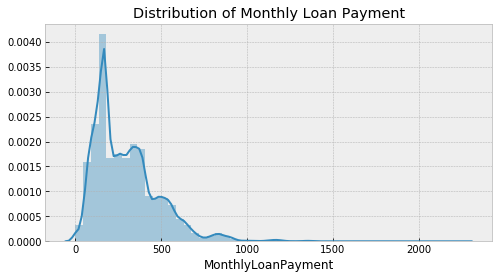

In [20]:
plt.figure(figsize=[8,4])
loan_data['MonthlyLoanPayment'].describe(), sns.distplot(loan_data['MonthlyLoanPayment']).set_title('Distribution of Monthly Loan Payment')

The mean estimated monthly loan payment is 292 USD and the distribution of the graph is left skewed. This means more borrower are paying less than 292 USD.

(count    84669.000000
 mean         0.030649
 std          0.010369
 min          0.002150
 25%          0.023970
 50%          0.028380
 75%          0.037310
 max          0.100800
 Name: OriginationRate, dtype: float64,
 Text(0.5, 1.0, 'Distribution of Origination Rate'))

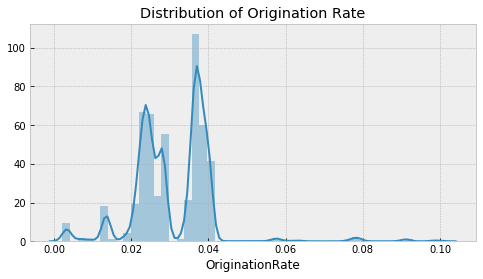

In [21]:
plt.figure(figsize=[8,4])
loan_data['OriginationRate'].describe(), sns.distplot(loan_data['OriginationRate']).set_title('Distribution of Origination Rate')

The median origination rate is 2.8%. It is distributed in clusters as the rate is computed based on the risk profile. So each risk profile is associated with a origination rate

(count    84669.000000
 mean       258.424653
 std        176.989038
 min          3.350000
 25%        133.560000
 50%        211.970000
 75%        359.700000
 max       1943.000000
 Name: OriginationFee, dtype: float64,
 Text(0.5, 1.0, 'Distribution of Origination Fee'))

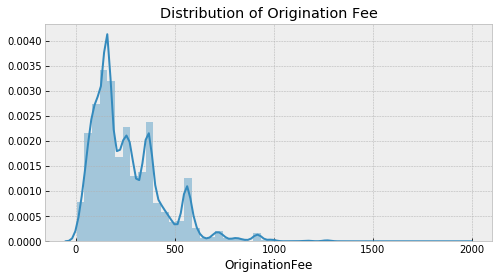

In [22]:
plt.figure(figsize=[8,4])
loan_data['OriginationFee'].describe(), sns.distplot(loan_data['OriginationFee']).set_title('Distribution of Origination Fee')

The mean Origination Fee is 258 USD and the distribution is left skewed. 

(count    84669.000000
 mean         0.080335
 std          0.046718
 min          0.004900
 25%          0.042400
 50%          0.072400
 75%          0.112000
 max          0.366000
 Name: EstimatedLoss, dtype: float64,
 Text(0.5, 1.0, 'Distribution of Estimated Loss'))

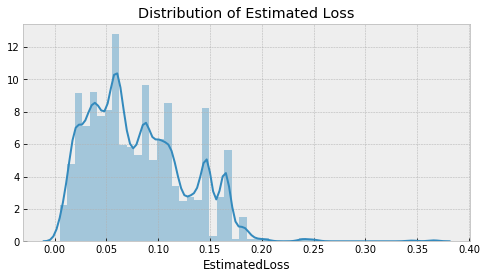

In [23]:
plt.figure(figsize=[8,4])
loan_data['EstimatedLoss'].describe(), sns.distplot(loan_data['EstimatedLoss']).set_title('Distribution of Estimated Loss')

The distribution of estimated loss is left skewed. That is plausible due the fact that the lender want to minimize his risk to 
get back the loan.

(count    84669.000000
 mean         0.096093
 std          0.030363
 min         -0.182700
 25%          0.074550
 50%          0.092110
 75%          0.116600
 max          0.283700
 Name: EstimatedReturn, dtype: float64,
 Text(0.5, 1.0, 'Distribution of Estimated Return in %'))

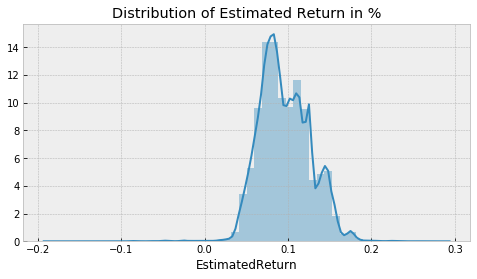

In [24]:
plt.figure(figsize=[8,4])
loan_data['EstimatedReturn'].describe(), sns.distplot(loan_data['EstimatedReturn']).set_title('Distribution of Estimated Return in %')

The mean estimated return is 9.6%. The minimun is negative as for many loans has been estimated a loss.

(count    84669.000000
 mean         0.196087
 std          0.074603
 min          0.040000
 25%          0.135900
 50%          0.187500
 75%          0.257400
 max          0.360000
 Name: BorrowerRate, dtype: float64,
 Text(0.5, 1.0, 'Distribution of BorrowerRate'))

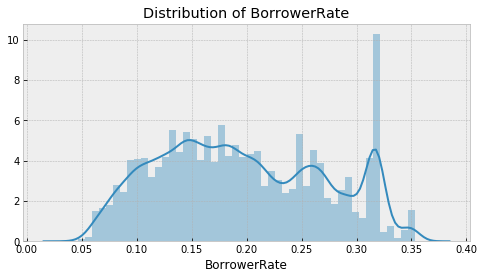

In [25]:
plt.figure(figsize=[8,4])
loan_data['BorrowerRate'].describe(), sns.distplot(loan_data['BorrowerRate']).set_title('Distribution of BorrowerRate')

The median BorrowerRate is 1.86%. The distribution is slightly right skewed.

(count    84669.000000
 mean         5.945104
 std          2.375364
 min          1.000000
 25%          4.000000
 50%          6.000000
 75%          8.000000
 max         11.000000
 Name: ProsperScore, dtype: float64,
 Text(0.5, 1.0, 'Distribution of ProsperScore'))

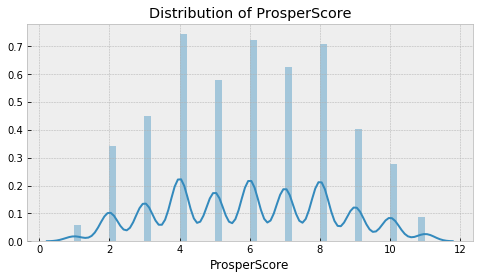

In [26]:
plt.figure(figsize=[8,4])
loan_data['ProsperScore'].describe(), sns.distplot(loan_data['ProsperScore']).set_title('Distribution of ProsperScore')

Most of the borrowers receiving a ProsperScore of 6 as the median shows.

### 6.2 Univariate Visualizations - Categorical Variables

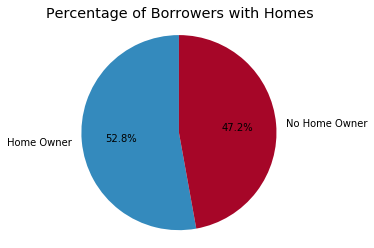

In [27]:
labels = 'Home Owner', 'No Home Owner'

sorted_counts = loan_data['IsBorrowerHomeowner'].value_counts()
plt.pie(sorted_counts, labels = labels, startangle= 90, autopct='%1.1f%%')
plt.axis('square')
plt.title('Percentage of Borrowers with Homes');

52.8% of the loan borrowers are home owners.

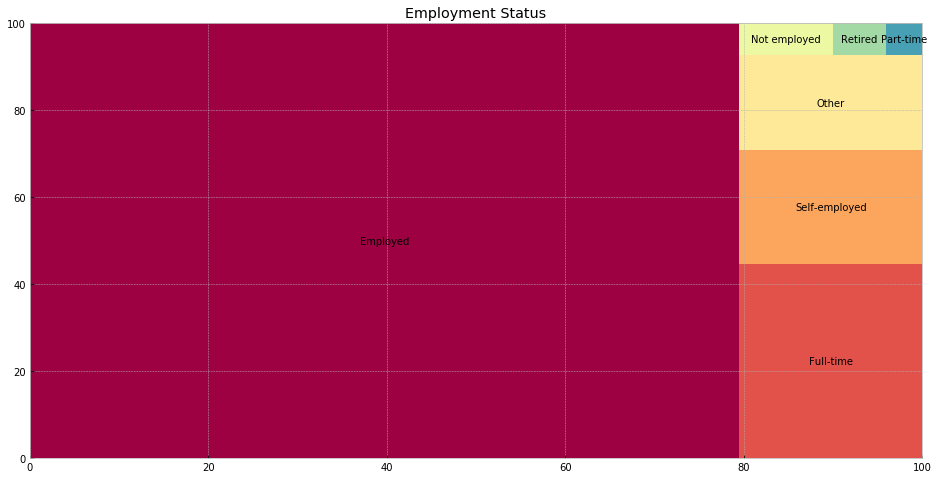

In [68]:
plt.figure(figsize=(16,8))

n_categories = 7
colors = [plt.cm.Spectral(i/float(n_categories)) for i in range(n_categories)]

sizes=loan_data['EmploymentStatus'].value_counts(normalize=True).values
label=loan_data['EmploymentStatus'].value_counts(normalize=True).index
squarify.plot(sizes=sizes, label=label, color=colors)
plt.title('Employment Status');

In [48]:
loan_data['ListingCategory'].value_counts(normalize=True)*100

Debt Consolidation    62.697091
Other                 10.839859
Home Improvement       8.011197
Business               6.241954
Auto                   2.633786
Household Expanses     2.357415
Medical/Dental         1.797588
Taxes                  1.045247
Large Purchases        1.034617
Wedding Loans          0.910605
Vacation               0.907062
Motorcycle             0.359045
Student Use            0.310621
Engagement Ring        0.256292
Baby&Adoption          0.235033
Cosmetic Procedure     0.107477
Boat                   0.100391
Green Loans            0.069683
RV                     0.061416
Not Available          0.023621
Name: ListingCategory, dtype: float64

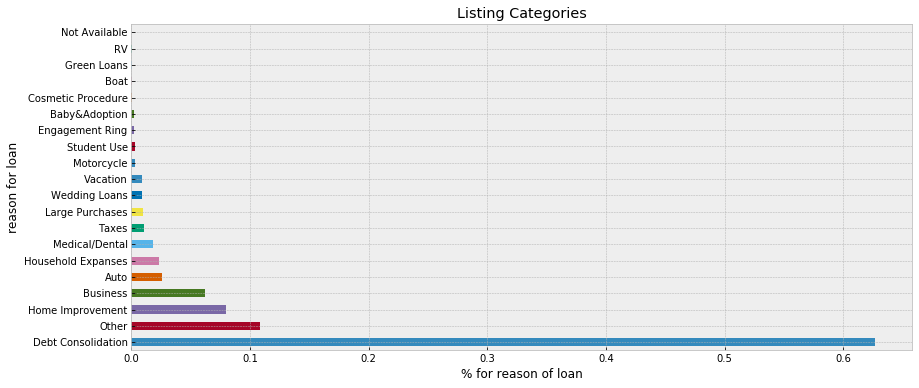

In [30]:
loan_data['ListingCategory'].value_counts(normalize=True).plot(kind='barh', 
figsize=[14,6], title='Listing Categories')
plt.ylabel('reason for loan')
plt.xlabel('% for reason of loan')
plt.show()

The most commonly used reason for a loan is Debt Consolidation with 62.7%

In [31]:
loan_data['ProsperRating (Alpha)'].value_counts(normalize=True)*100 

C     21.617121
B     18.384533
A     17.137323
D     16.827883
E     11.552044
HR     8.176546
AA     6.304551
Name: ProsperRating (Alpha), dtype: float64

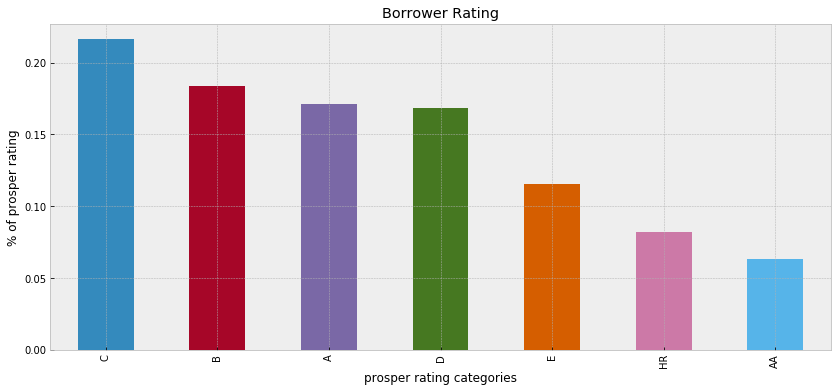

In [32]:
my_df = loan_data['ProsperRating (Alpha)'].value_counts(normalize=True)
ax = my_df.plot(kind='bar', figsize=[14,6], title='Borrower Rating')
ax.set_ylabel('% of prosper rating')
ax.set_xlabel('prosper rating categories')
plt.show()

The most frequently appearing rating is C with 21.6%

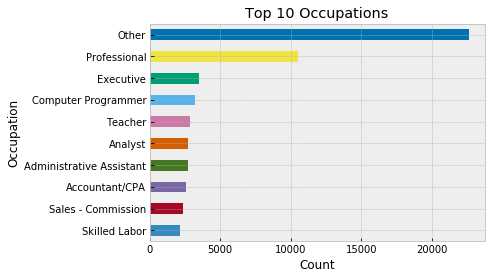

In [33]:
loan_data['Occupation'].value_counts()[9::-1].plot(kind='barh')
plt.title('Top 10 Occupations')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.figsize=(14,6)

The most common occupation is Other with roughly 23000 borrowers, followed by professionals with roughly 10000.

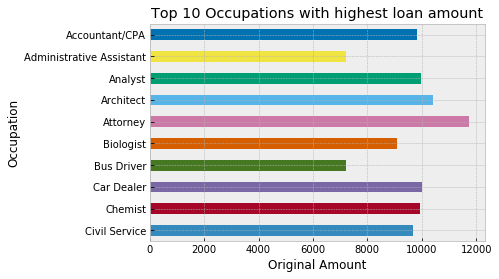

In [34]:
top_ocu = loan_data.groupby('Occupation').LoanOriginalAmount.mean()[9::-1]
top_ocu.plot(kind = 'barh')
plt.xlabel('Original Amount')
plt.title('Top 10 Occupations with highest loan amount')
plt.figsize=(14,6);

The occupation with the highest mean loan amount are Attorneys with roughly 12000$

### 6.3 Bivariate Visualizations

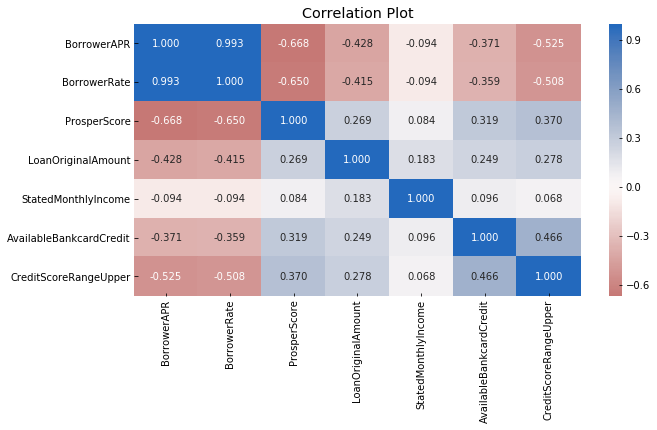

In [35]:
# correlation plot 

num_vars = ['BorrowerAPR', 'BorrowerRate', 'ProsperScore', 'LoanOriginalAmount',
            'StatedMonthlyIncome', 'AvailableBankcardCredit', 'CreditScoreRangeUpper']

plt.figure(figsize = [10, 5])
sns.heatmap(loan_data[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

Correlation Plot: There are no strong positive relationships between any pairs. That makes sense because if a borrower has a  AvailableBankcardCredit it will lead to a better creditscore. BorrowerAPR and ProsperScore are negative because borrowers with lower score are more likely to pay higher APR. Also a higher CreditScore means the borrowers are more trustworthy and more likely to pay back their loan, therefore it recevied lower APR.

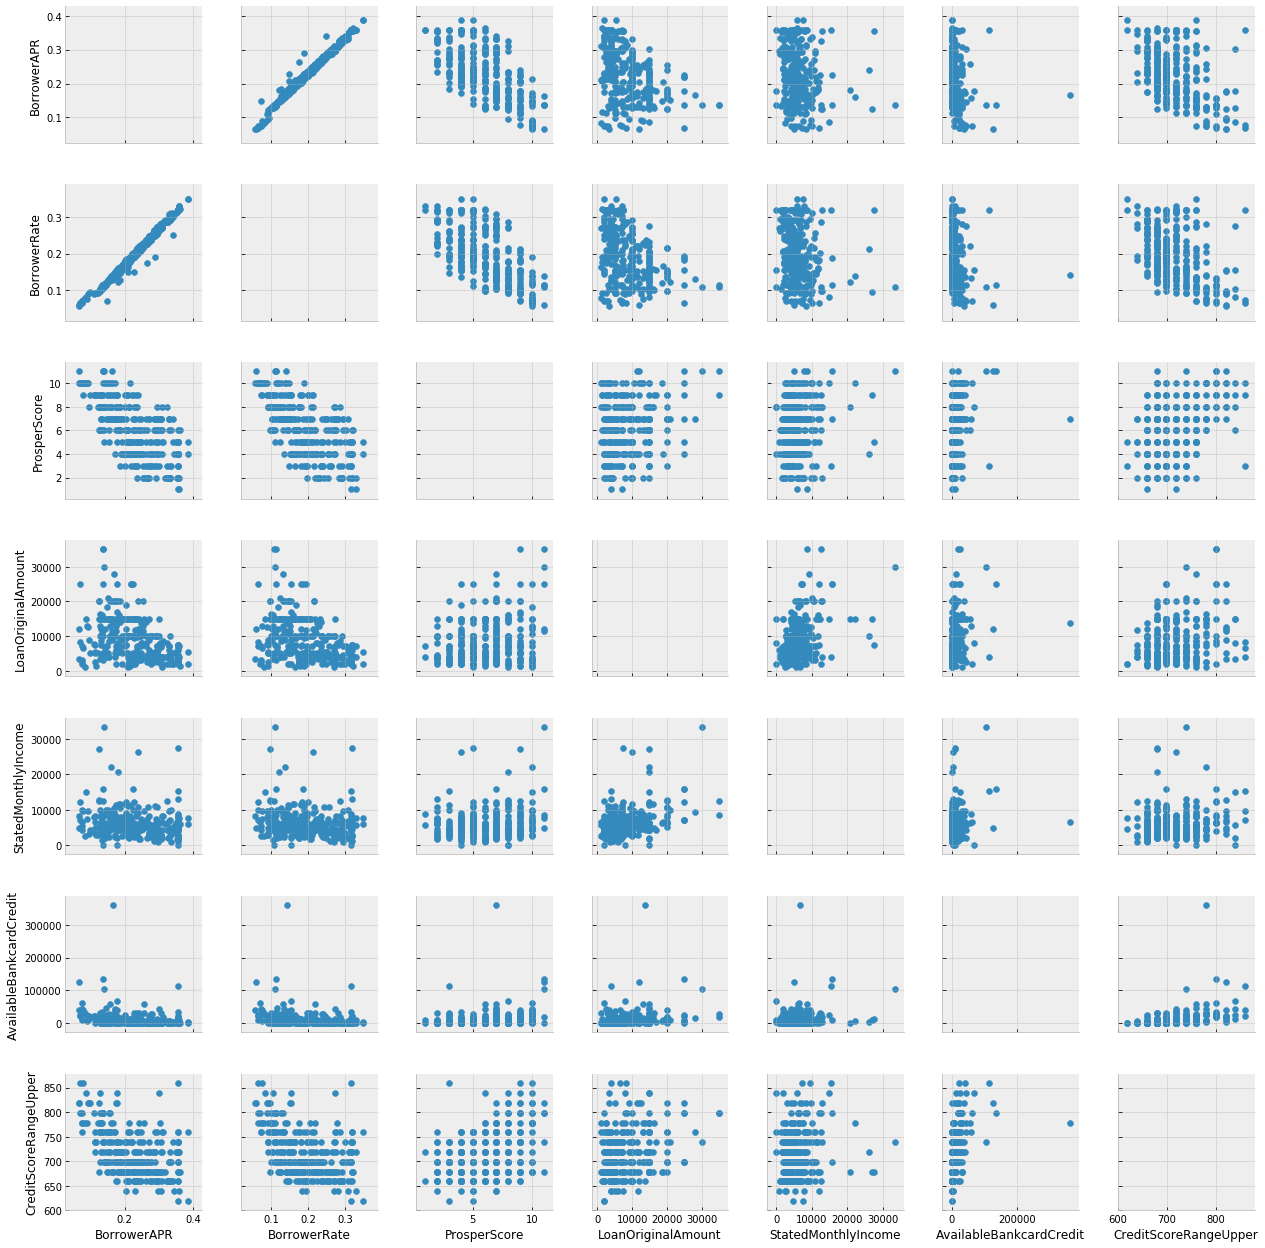

In [36]:
# plot matrix: only 300 random loans are used to see better results


num_vars = ['BorrowerAPR', 'BorrowerRate', 'ProsperScore', 'LoanOriginalAmount',
            'StatedMonthlyIncome', 'AvailableBankcardCredit', 'CreditScoreRangeUpper']

samples = np.random.choice(loan_data.shape[0], 300, replace = False)
loan_sam = loan_data.loc[samples,:]

g = sns.PairGrid(data = loan_sam, vars = num_vars)
g.map_offdiag(plt.scatter);

Similar to the correlation diagram, we can determine which pair has negative or positive relationships by analyzing the pattern in each scatterplot. ProsperScore seems to have more to do with BorrowerRate than with other variables. Also intresting is the correlation of LoanOriginalAmount and ProsperScore.
    


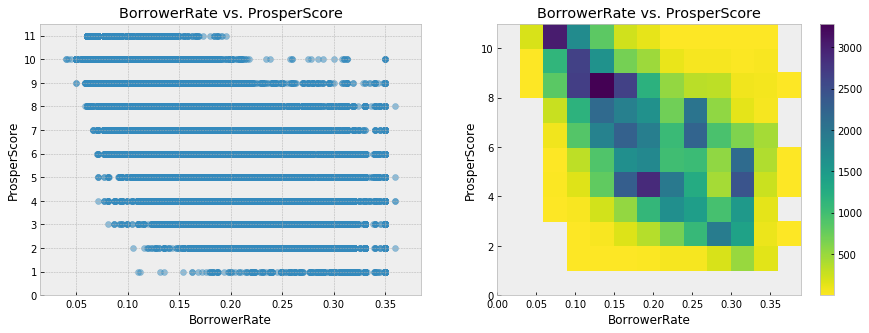

In [37]:
# scatter and heat plot for comparing BorrowerRate and ProsperScore
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = loan_data, x = 'BorrowerRate', y = 'ProsperScore', alpha =  0.5)
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerRate vs. ProsperScore')
plt.xlabel('BorrowerRate')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, loan_data['BorrowerRate'].max()+0.05, 0.03)
bins_y = np.arange(0, loan_data['ProsperScore'].max()+1, 1)
plt.hist2d(data = loan_data, x = 'BorrowerRate', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerRate vs. ProsperScore')
plt.xlabel('BorrowerRate')
plt.ylabel('ProsperScore');

BorrowerRate vs. ProsperScore: This is what we expected because people with higher ratings tend to be more reliable and trustworthy and therefore receive a lower BorrowerRate to pay back their loans.

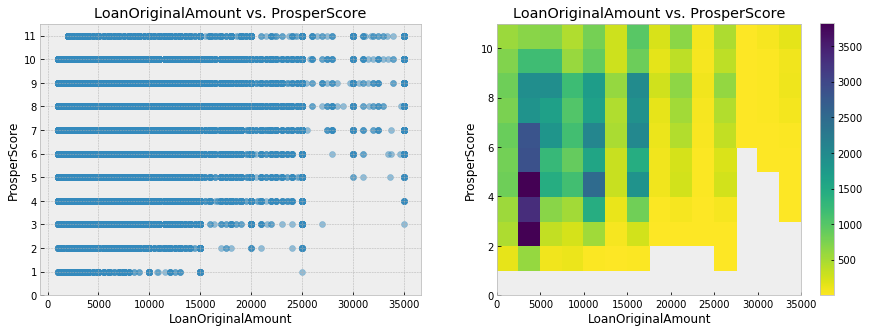

In [38]:
# scatter and heat plot for comparing ProsperScore and LoanOriginalAmount. 
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = loan_data, x = 'LoanOriginalAmount', y = 'ProsperScore', alpha =  0.5)
plt.yticks(np.arange(0, 12, 1))
plt.title('LoanOriginalAmount vs. ProsperScore')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('ProsperScore')




plt.subplot(1, 2, 2)
bins_x = np.arange(0, loan_data['LoanOriginalAmount'].max()+50, 2500)
bins_y = np.arange(0, loan_data['ProsperScore'].max()+1, 1)
plt.hist2d(data = loan_data, x = 'LoanOriginalAmount', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('LoanOriginalAmount vs. ProsperScore')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('ProsperScore');

LoanOriginalAmount vs ProsperScore. This is how expected. Borrower with a better rating are tend to borrow more money. But the diagram also shows that there are a lot of borrower with bad ratings. Therefore more borrowers borrow less money because of their bad rating situation.

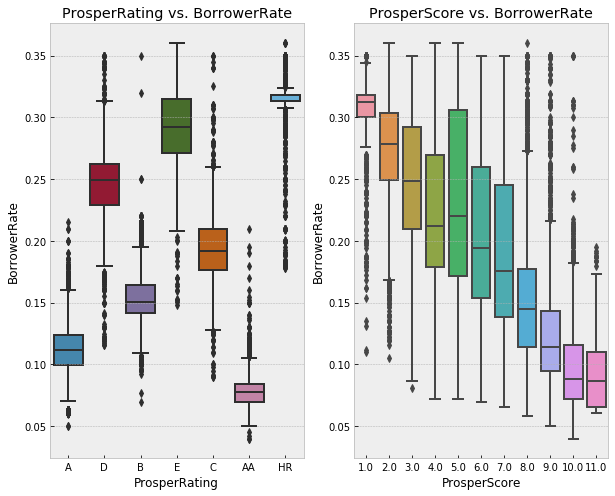

In [39]:
# box plot for BorrowerRate vs. ProsperRating & ProsperScore
plt.figure(figsize = [15, 10]) 

plt.subplot(1, 2, 1)
sns.boxplot(data = loan_data, x = 'ProsperRating (Alpha)', y = 'BorrowerRate')
plt.gcf().set_size_inches(10, 8)
plt.title('ProsperRating vs. BorrowerRate')
plt.xlabel('ProsperRating')
plt.ylabel('BorrowerRate')

plt.subplot(1, 2, 2)
sns.boxplot(data = loan_data, x = 'ProsperScore', y = 'BorrowerRate')
plt.gcf().set_size_inches(10, 8)
plt.title('ProsperScore vs. BorrowerRate')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerRate');

Boxplots for ProsperRating and ProsperScore vs BorrowerRate

A good ProsperRating or a good ProsperScore does effect the percentage of the rate the borrower will get. The higher the rating the lower the percentage and the earlier the ProsperRating letter appears in the alphabet, the better the percentage. For both of the graphics there is a negative relationship with BorrowerRate.

In [40]:
# median of estimated return across Rating Categories
loan_data.groupby('ProsperRating (Alpha)')['EstimatedReturn'].median().sort_values(ascending=True)

ProsperRating (Alpha)
AA    0.05100
A     0.06663
B     0.08215
C     0.09220
D     0.11630
HR    0.12210
E     0.12370
Name: EstimatedReturn, dtype: float64

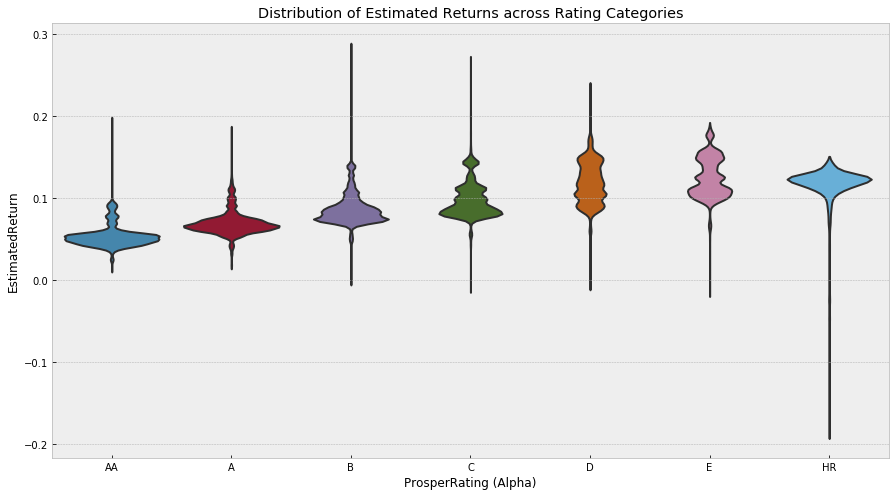

In [41]:
plt.figure(figsize=[15,8])
sns.violinplot(data=loan_data, x='ProsperRating (Alpha)', y='EstimatedReturn',inner= None, 
order=['AA','A','B','C','D','E','HR']).set_title('Distribution of Estimated Returns across Rating Categories');

The median return increases as the risk profile increases, except for the ProsperRating E which has a higher median return than HR. It may be due to the fact the HR loans have an higher estimated loss that affects the estimated returns.

In [42]:
# median of estimated return across Rating Categories
loan_data.groupby('ProsperRating (Alpha)')['EstimatedLoss'].median().sort_values(ascending=True)

ProsperRating (Alpha)
AA    0.0150
A     0.0324
B     0.0524
C     0.0774
D     0.1075
E     0.1425
HR    0.1650
Name: EstimatedLoss, dtype: float64

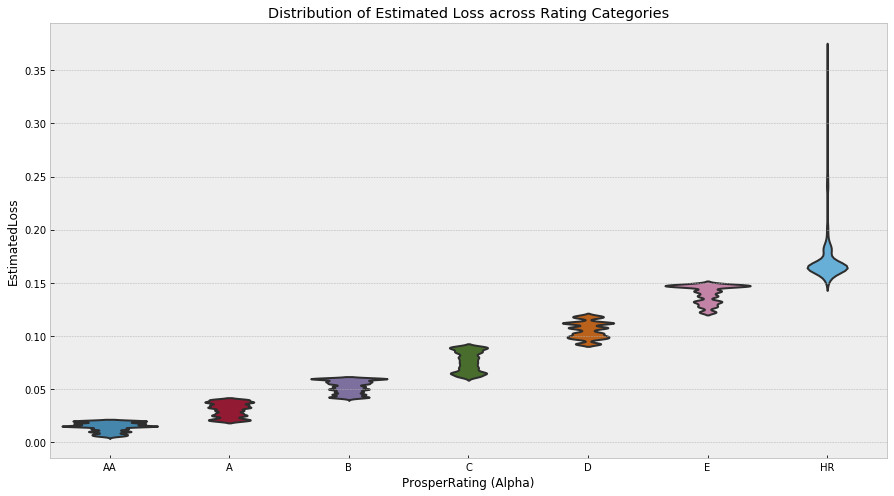

In [43]:
plt.figure(figsize=[15,8])
sns.violinplot(data=loan_data, x='ProsperRating (Alpha)', y='EstimatedLoss',inner= None, 
order=['AA','A','B','C','D','E','HR']).set_title('Distribution of Estimated Loss across Rating Categories');

The median loss increases as the risk profile increases. This totally makes sense because a worse risk profile leads to higher loss for the lender.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The correlation and matrix diagrams are really helpful to show all possible variables related to BorrowerAPR that we want to analyze. Of all the variables, ProsperScore and ProsperRating have a stronger relationship to BorrowerAPR and BorrowerRate. As expected, the risk rating values play a very large role in the granting of loans to borrowers. Univariate exploration is a very good tool to analyze data comprehensively and to draw conclusions from it.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

CreditScoreRangeUpper and AvailableBankcardCredit are positive correlated to ProsperScore and negative correlated to BorrwerAPR and BorrowerRate.

### 6.4 Multivariate Exploration

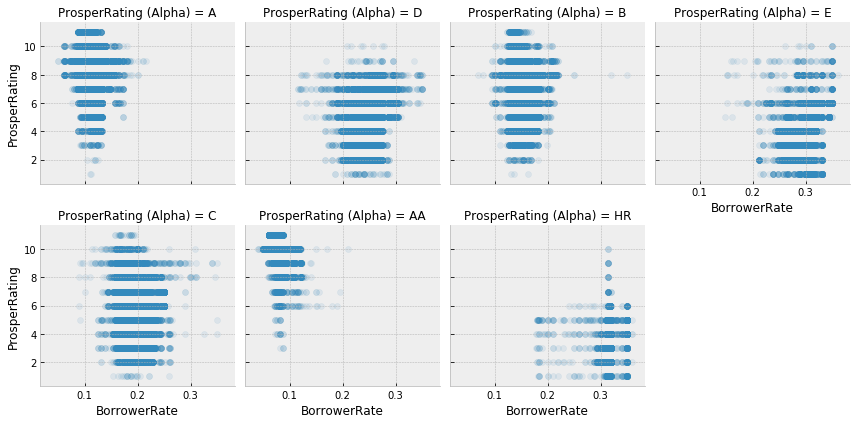

In [44]:
g = sns.FacetGrid(data = loan_data, col = 'ProsperRating (Alpha)', col_wrap = 4, height = 3)
g.map(plt.scatter, 'BorrowerRate', 'ProsperScore', alpha = 0.1)
g.set_xlabels('BorrowerRate')
g.set_ylabels('ProsperRating')

plt.show()

This visualizations are helpful to show the BorrowerRate vs ProsperRating for the individual letter ratings.  The diagrams underline our statement from the previous findings from the violin plots. For a better rating letter (AA best) the lower the BorrowerRate. 

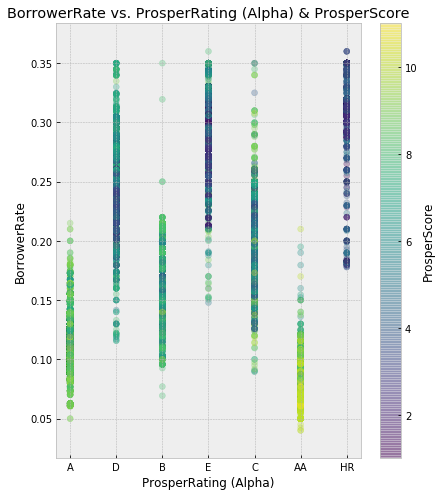

In [45]:
plt.figure(figsize=[15,8])
plt.subplot(1, 2, 2)
plt.scatter(data = loan_data, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'ProsperScore')
plt.title('BorrowerRate vs. ProsperRating (Alpha) & ProsperScore')
plt.xlabel('ProsperRating (Alpha)')
plt.ylabel('BorrowerRate');

BorrowerRate vs ProsperRating vs ProsperScore. This diagramm also underlines the insights from the diagrams before. It shows that BorrowerRate is positive correlated with ProsperRating and ProsperScore. The better the Rating and the Score, the lower the individual BorrowerRate.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There is a positive relationship between ProsperRating, ProsperScore and BorrowerRate. The diagrams from above all underline our earlier investigations that a better ProsperRating or ProsperScore leads to better BorroweRate. 